In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()
from sklearn.model_selection import train_test_split

import io



Saving housing.csv to housing.csv


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

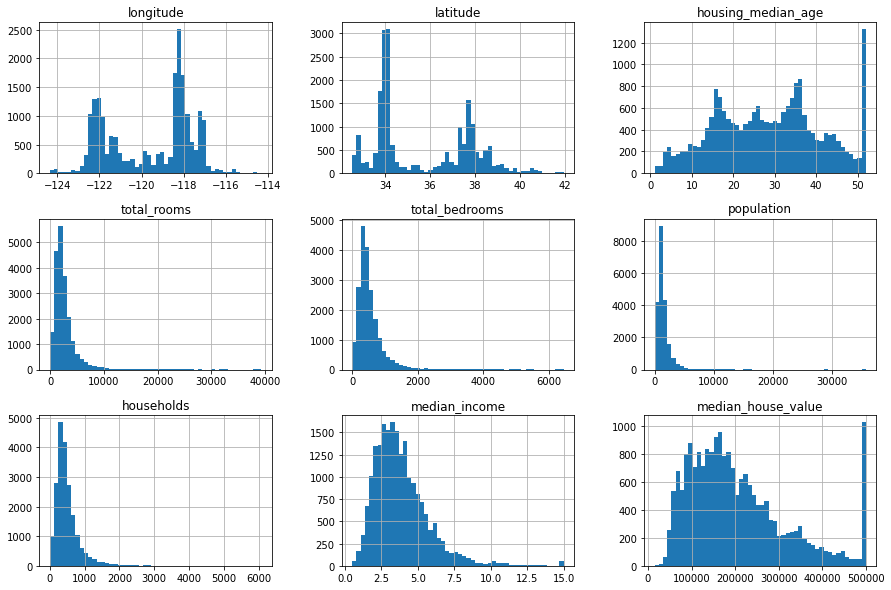

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('housing.csv')
dataset.hist(bins=50,figsize=(15,10))
dataset.isnull().sum()


In [3]:
dataset = dataset.fillna(435)
dataset.info()
dataset = pd.get_dummies(dataset)
dataset.isnull().sum()

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [4]:
dataset["rooms_per_household"] = dataset["total_rooms"]/dataset["households"]
dataset["bedrooms_per_room"] = dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["population_per_household"] = dataset["population"]/dataset["households"]
dataset = dataset.drop(["households","total_bedrooms","population"],axis=1)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,8.3252,452600.0,0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,7.2574,352100.0,0,0,0,1,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,5.6431,341300.0,0,0,0,1,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,3.8462,342200.0,0,0,0,1,0,6.281853,0.172096,2.181467


In [6]:
#train test split
X = dataset.drop("median_house_value",axis=1)
y = dataset["median_house_value"]


KFold(n_splits=10, random_state=None, shuffle=True)
test efficiency 0.44476744186046513
train efficiency 0.4352390180878553
--------------------------------
test efficiency 0.42005813953488375
train efficiency 0.4397071490094746
--------------------------------
test efficiency 0.4316860465116279
train efficiency 0.4397071490094746
--------------------------------
test efficiency 0.4307170542635659
train efficiency 0.4401378122308355
--------------------------------
test efficiency 0.4321705426356589
train efficiency 0.4393303186907838
--------------------------------
test efficiency 0.4442829457364341
train efficiency 0.438953488372093
--------------------------------
test efficiency 0.4442829457364341
train efficiency 0.4380921619293712
--------------------------------
test efficiency 0.4331395348837209
train efficiency 0.4392226528854436
--------------------------------
test efficiency 0.44670542635658916
train efficiency 0.43793066322136087
--------------------------------
test effi

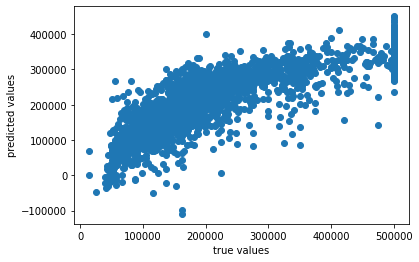

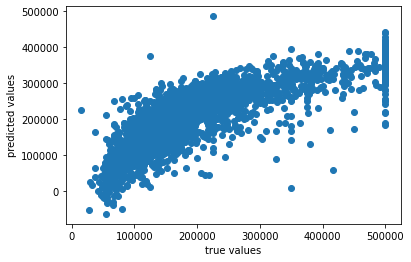

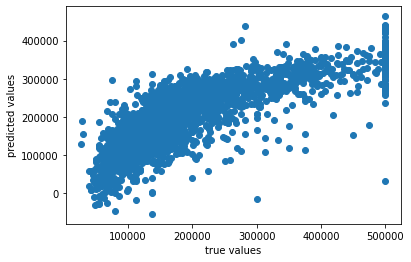

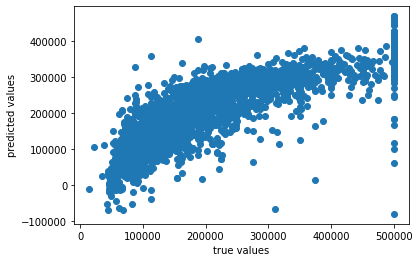

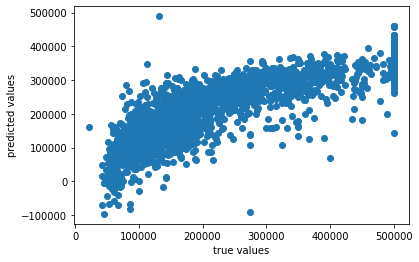

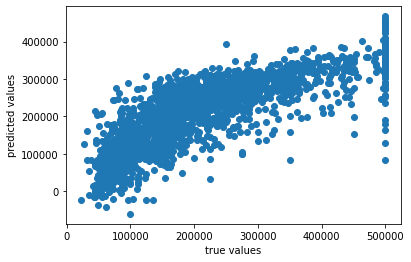

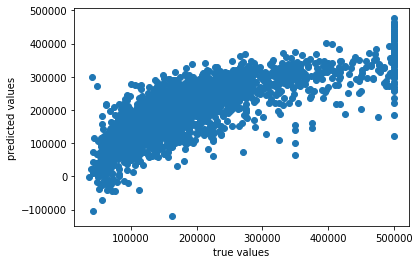

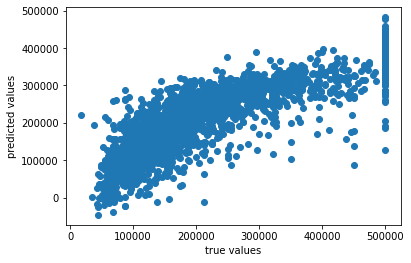

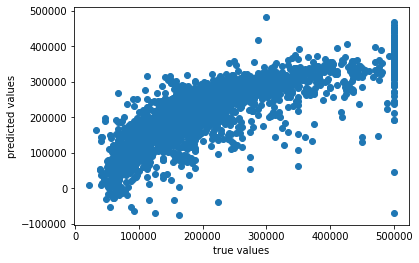

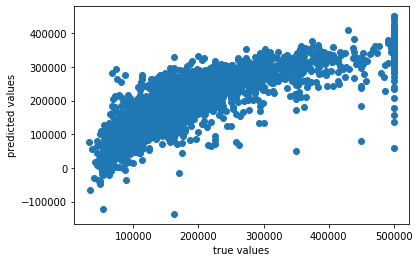

In [10]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(X)
print(kf)
train_ac = 0;
test_ac = 0;

for train_index, test_index in kf.split(X):
    pipe = Pipeline((
    ("sc",StandardScaler()),
    ("pt",PowerTransformer()),
    ("lr",LinearRegression()),
    ))

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pipe.fit(X_train,y_train)

    y_poly_pred = pipe.predict(X_test)
    y_pred = pipe.predict(X_train)
    correct =0
    total =0
    correct1 =0
    total1 =0
    for x in range(len(y_poly_pred)):
      total =total +1
      if ((y_test.iloc[x]+y_test.iloc[x]/5)>=y_poly_pred[x]) and ((y_test.iloc[x]-y_test.iloc[x]/5)<=y_poly_pred[x]):
        correct = correct +1

    for x in range(len(y_pred)):
      total1 =total1 +1
      if ((y_train.iloc[x]+y_train.iloc[x]/5)>=y_pred[x]) and ((y_train.iloc[x]-y_train.iloc[x]/5)<=y_pred[x]):
        correct1 = correct1 +1

    testac = correct/total
    trainac = correct1/total1
    print("test efficiency",testac)
    print("train efficiency",trainac)
    print("--------------------------------")
    test_ac+=testac
    train_ac+=trainac

    plt.figure()
    plt.scatter(y_test,y_poly_pred)
    plt.xlabel('true values')
    plt.ylabel('predicted values')
print("AVERAGE")

print("Test accuracy" ,test_ac*10)
print("Train accuracy" ,train_ac*10)  

KFold(n_splits=10, random_state=None, shuffle=True)
test efficiency 0.6976744186046512
train efficiency 0.9483742463393626
--------------------------------
test efficiency 0.6928294573643411
train efficiency 0.9475667527993109
--------------------------------
test efficiency 0.7165697674418605
train efficiency 0.9448751076658053
--------------------------------
test efficiency 0.7122093023255814
train efficiency 0.9486972437553833
--------------------------------
test efficiency 0.7296511627906976
train efficiency 0.9475667527993109
--------------------------------
test efficiency 0.686531007751938
train efficiency 0.9476744186046512
--------------------------------
test efficiency 0.7175387596899225
train efficiency 0.9453596037898363
--------------------------------
test efficiency 0.7093023255813954
train efficiency 0.9460594315245479
--------------------------------
test efficiency 0.7015503875968992
train efficiency 0.9459517657192076
--------------------------------
test efficien

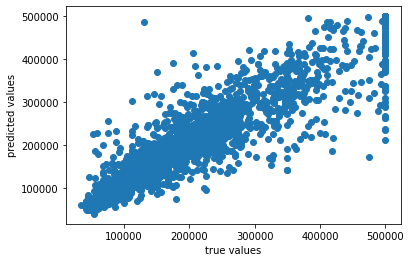

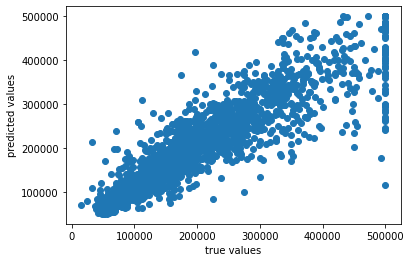

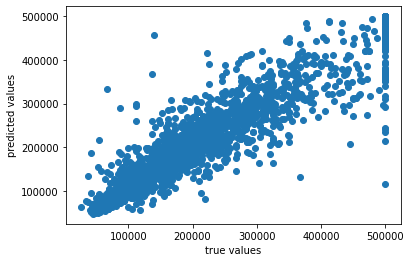

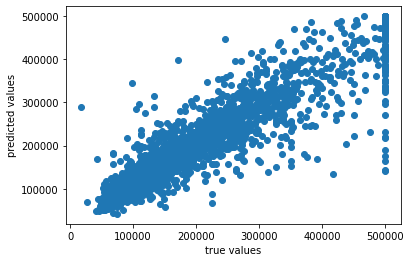

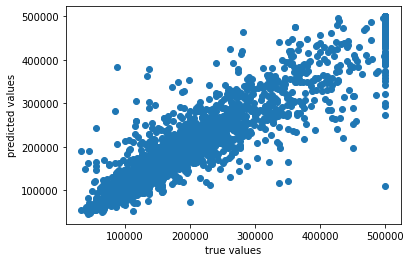

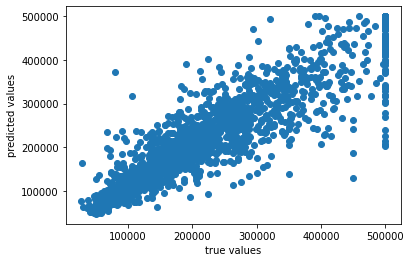

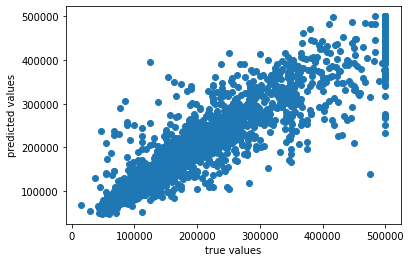

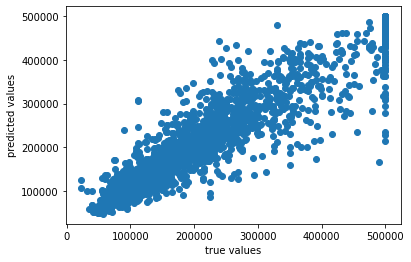

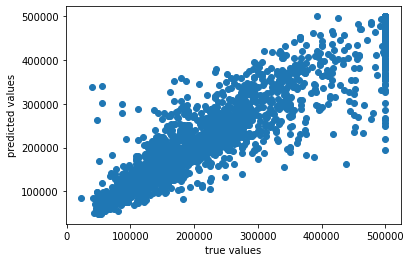

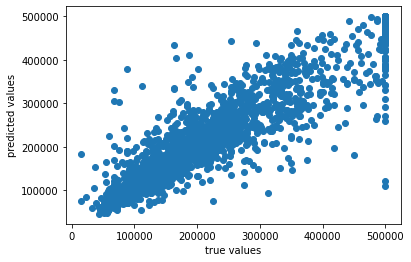

In [11]:
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(X)
print(kf)
train_ac = 0;
test_ac = 0;

for train_index, test_index in kf.split(X):
    pipe = Pipeline((
    ("sc",StandardScaler()),
    ('r', RandomForestRegressor(n_estimators=20)),
    ))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pipe.fit(X_train,y_train)

    y_poly_pred = pipe.predict(X_test)
    y_pred = pipe.predict(X_train)
    correct =0
    total =0
    correct1 =0
    total1 =0
    for x in range(len(y_poly_pred)):
      total =total +1
      if ((y_test.iloc[x]+y_test.iloc[x]/5)>=y_poly_pred[x]) and ((y_test.iloc[x]-y_test.iloc[x]/5)<=y_poly_pred[x]):
        correct = correct +1

    for x in range(len(y_pred)):
      total1 =total1 +1
      if ((y_train.iloc[x]+y_train.iloc[x]/5)>=y_pred[x]) and ((y_train.iloc[x]-y_train.iloc[x]/5)<=y_pred[x]):
        correct1 = correct1 +1

    testac = correct/total
    trainac = correct1/total1
    print("test efficiency",testac)
    print("train efficiency",trainac)
    print("--------------------------------")
    test_ac+=testac
    train_ac+=trainac

    plt.figure()
    plt.scatter(y_test,y_poly_pred)
    plt.xlabel('true values')
    plt.ylabel('predicted values')
print("AVERAGE")

print("Test accuracy" ,test_ac*10)
print("Train accuracy" ,train_ac*10)  
       


KFold(n_splits=10, random_state=None, shuffle=True)
test efficiency 0.5954457364341085
train efficiency 1.0
--------------------------------
test efficiency 0.6143410852713178
train efficiency 1.0
--------------------------------
test efficiency 0.6162790697674418
train efficiency 1.0
--------------------------------
test efficiency 0.6128875968992248
train efficiency 1.0
--------------------------------
test efficiency 0.6080426356589147
train efficiency 1.0
--------------------------------
test efficiency 0.6061046511627907
train efficiency 1.0
--------------------------------
test efficiency 0.6002906976744186
train efficiency 1.0
--------------------------------
test efficiency 0.6051356589147286
train efficiency 1.0
--------------------------------
test efficiency 0.5925387596899225
train efficiency 1.0
--------------------------------
test efficiency 0.6119186046511628
train efficiency 1.0
--------------------------------
AVERAGE
Test accuracy 60.62984496124031
Train accuracy 100

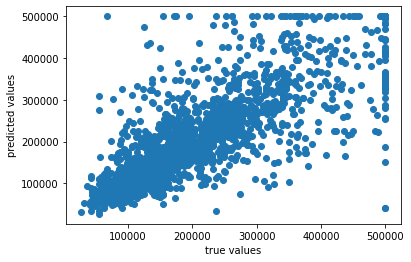

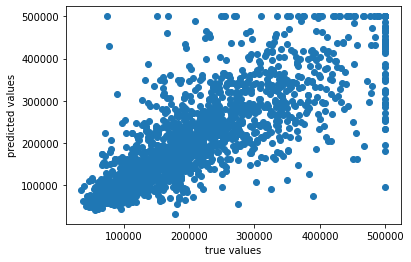

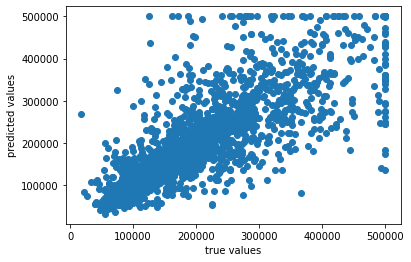

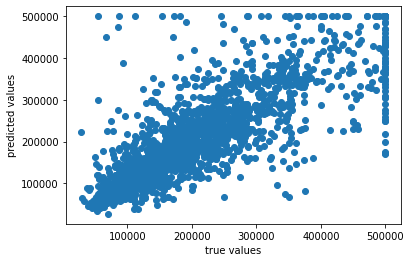

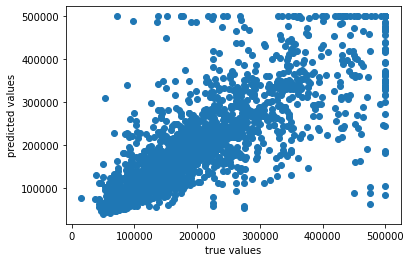

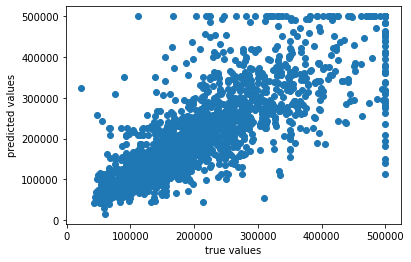

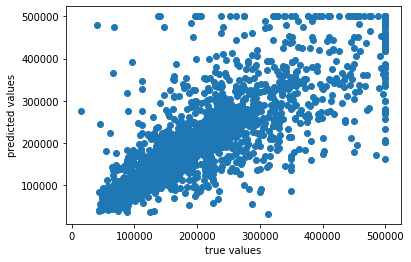

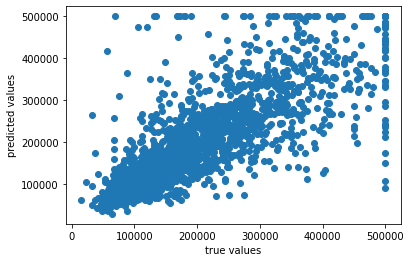

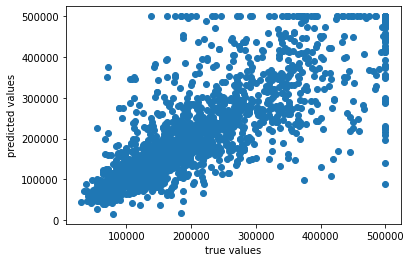

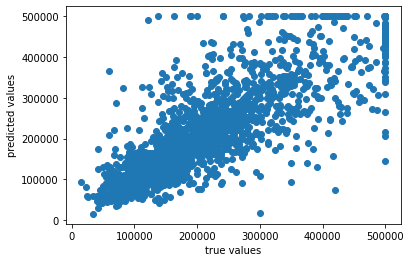

In [12]:
from sklearn.tree import DecisionTreeRegressor
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(X)
print(kf)
train_ac = 0;
test_ac = 0;
for train_index, test_index in kf.split(X):
    pipe = Pipeline((
    ("sc",StandardScaler()),
    ('r', DecisionTreeRegressor(random_state = 0)),
    ))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pipe.fit(X_train,y_train)

    y_poly_pred = pipe.predict(X_test)
    y_pred = pipe.predict(X_train)
    correct =0
    total =0
    correct1 =0
    total1 =0
    for x in range(len(y_poly_pred)):
      total =total +1
      if ((y_test.iloc[x]+y_test.iloc[x]/5)>=y_poly_pred[x]) and ((y_test.iloc[x]-y_test.iloc[x]/5)<=y_poly_pred[x]):
        correct = correct +1

    for x in range(len(y_pred)):
      total1 =total1 +1
      if ((y_train.iloc[x]+y_train.iloc[x]/5)>=y_pred[x]) and ((y_train.iloc[x]-y_train.iloc[x]/5)<=y_pred[x]):
        correct1 = correct1 +1

    testac = correct/total
    trainac = correct1/total1
    print("test efficiency",testac)
    print("train efficiency",trainac)
    print("--------------------------------")
    test_ac+=testac
    train_ac+=trainac

    plt.figure()
    plt.scatter(y_test,y_poly_pred)
    plt.xlabel('true values')
    plt.ylabel('predicted values')
print("AVERAGE")

print("Test accuracy" ,test_ac*10)
print("Train accuracy" ,train_ac*10)     


KFold(n_splits=10, random_state=None, shuffle=False)
test efficiency 0.37306201550387597
train efficiency 0.6689814814814815
--------------------------------
test efficiency 0.43943798449612403
train efficiency 0.6758182601205857
--------------------------------
test efficiency 0.5421511627906976
train efficiency 0.679801894918174
--------------------------------
test efficiency 0.6187015503875969
train efficiency 0.6701119724375538
--------------------------------
test efficiency 0.5765503875968992
train efficiency 0.6726421188630491
--------------------------------
test efficiency 0.624031007751938
train efficiency 0.6714039621016366
--------------------------------
test efficiency 0.5581395348837209
train efficiency 0.670165805340224
--------------------------------
test efficiency 0.5528100775193798
train efficiency 0.6733419465977606
--------------------------------
test efficiency 0.5416666666666666
train efficiency 0.6681739879414298
--------------------------------
test efficie

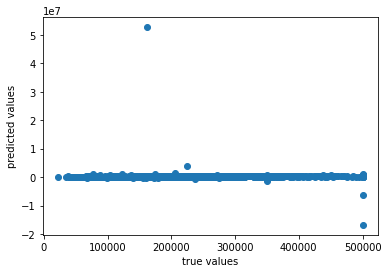

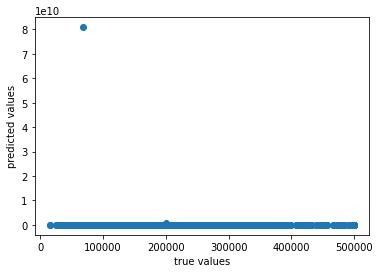

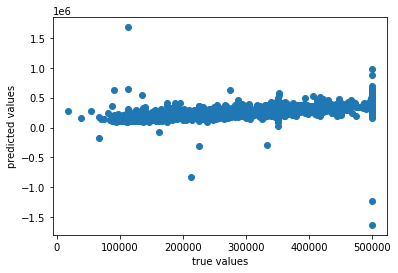

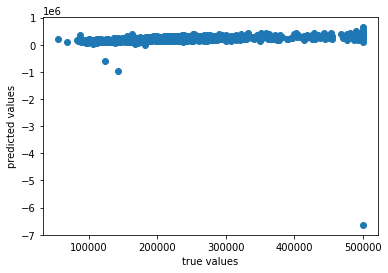

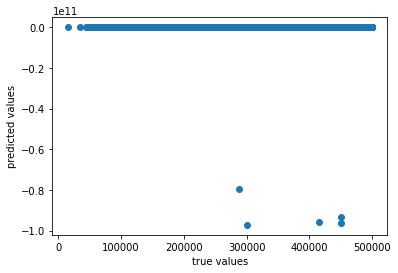

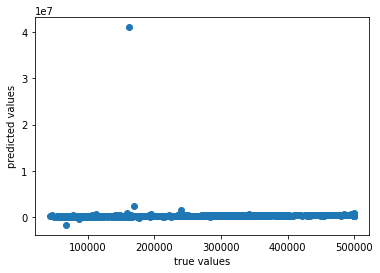

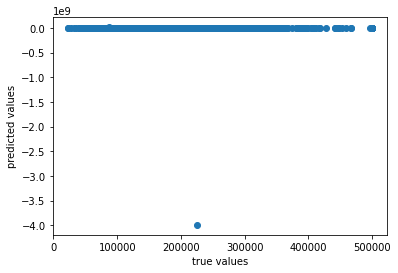

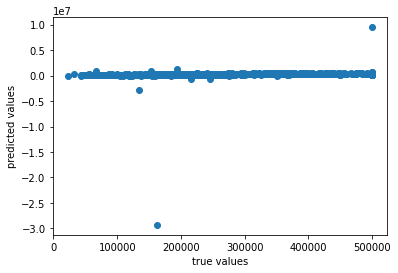

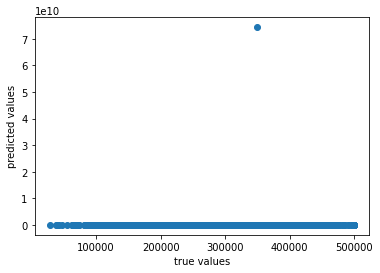

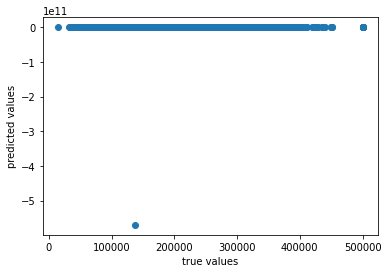

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)
train_ac = 0;
test_ac = 0;

for train_index, test_index in kf.split(X):
   
    pipe = Pipeline((
    ("sc",StandardScaler()),
    ("py",PolynomialFeatures(4)),
    ("lr",LinearRegression()),
    ))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pipe.fit(X_train,y_train)

    y_poly_pred = pipe.predict(X_test)
    y_pred = pipe.predict(X_train)
    correct =0
    total =0
    correct1 =0
    total1 =0
    for x in range(len(y_poly_pred)):
      total =total +1
      if ((y_test.iloc[x]+y_test.iloc[x]/5)>=y_poly_pred[x]) and ((y_test.iloc[x]-y_test.iloc[x]/5)<=y_poly_pred[x]):
        correct = correct +1

    for x in range(len(y_pred)):
      total1 =total1 +1
      if ((y_train.iloc[x]+y_train.iloc[x]/5)>=y_pred[x]) and ((y_train.iloc[x]-y_train.iloc[x]/5)<=y_pred[x]):
        correct1 = correct1 +1

    testac = correct/total
    trainac = correct1/total1
    print("test efficiency",testac)
    print("train efficiency",trainac)
    print("--------------------------------")
    test_ac+=testac
    train_ac+=trainac

    plt.figure()
    plt.scatter(y_test,y_poly_pred)
    plt.xlabel('true values')
    plt.ylabel('predicted values')
print("AVERAGE")

print("Test accuracy" ,test_ac*10)
print("Train accuracy" ,train_ac*10)       


KFold(n_splits=10, random_state=2, shuffle=True)
test efficiency 0.5092054263565892
train efficiency 0.4991386735572782
--------------------------------
test efficiency 0.5072674418604651
train efficiency 0.499515503875969
--------------------------------
test efficiency 0.499515503875969
train efficiency 0.5003229974160207
--------------------------------
test efficiency 0.5125968992248062
train efficiency 0.49784668389319553
--------------------------------
test efficiency 0.48546511627906974
train efficiency 0.5012381567614126
--------------------------------
test efficiency 0.49806201550387597
train efficiency 0.5059754521963824
--------------------------------
test efficiency 0.5048449612403101
train efficiency 0.4998923341946598
--------------------------------
test efficiency 0.499031007751938
train efficiency 0.5013458225667528
--------------------------------
test efficiency 0.49709302325581395
train efficiency 0.5000538329026701
--------------------------------
test efficienc

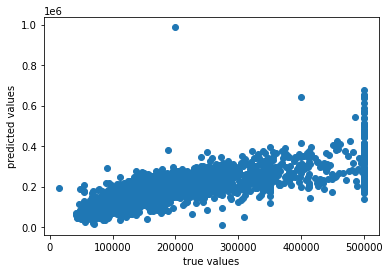

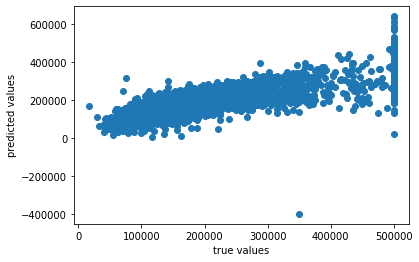

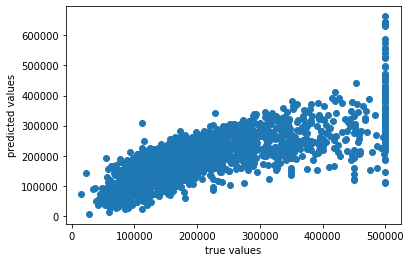

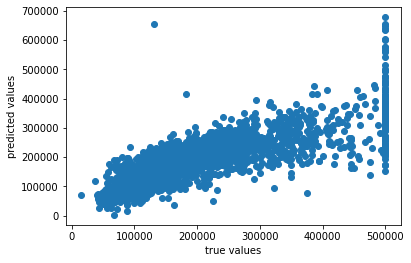

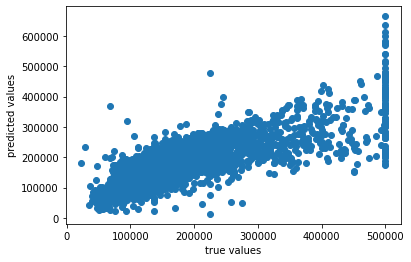

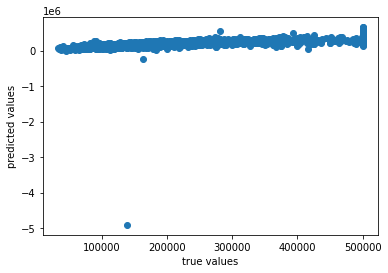

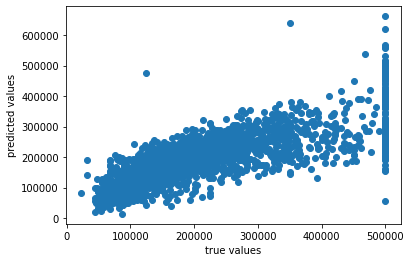

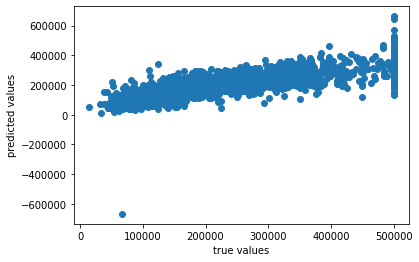

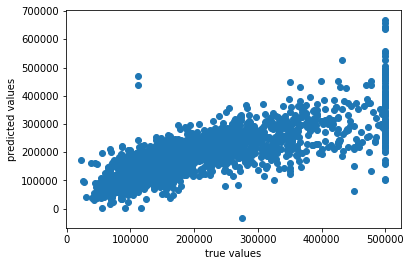

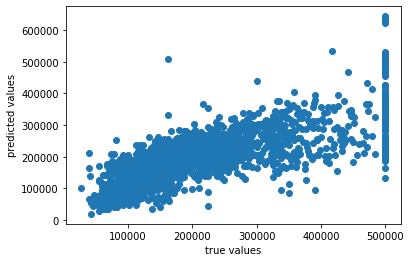

In [13]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True,random_state=2)
kf.get_n_splits(X)
print(kf)
train_ac = 0;
test_ac = 0;

for train_index, test_index in kf.split(X):
    pipe = Pipeline((
    ("sc",StandardScaler()),
    ("s", SVR(kernel='linear', C=100, gamma='auto')),
    ))

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pipe.fit(X_train,y_train)

    y_poly_pred = pipe.predict(X_test)
    y_pred = pipe.predict(X_train)
    correct =0
    total =0
    correct1 =0
    total1 =0
    for x in range(len(y_poly_pred)):
      total =total +1
      if ((y_test.iloc[x]+y_test.iloc[x]/5)>=y_poly_pred[x]) and ((y_test.iloc[x]-y_test.iloc[x]/5)<=y_poly_pred[x]):
        correct = correct +1

    for x in range(len(y_pred)):
      total1 =total1 +1
      if ((y_train.iloc[x]+y_train.iloc[x]/5)>=y_pred[x]) and ((y_train.iloc[x]-y_train.iloc[x]/5)<=y_pred[x]):
        correct1 = correct1 +1

    testac = correct/total
    trainac = correct1/total1
    print("test efficiency",testac)
    print("train efficiency",trainac)
    print("--------------------------------")
    test_ac+=testac
    train_ac+=trainac
    plt.figure()
    plt.scatter(y_test,y_poly_pred)
    plt.xlabel('true values')
    plt.ylabel('predicted values')
print("AVERAGE")

print("Test accuracy" ,test_ac*10)
print("Train accuracy" ,train_ac*10)  